## Q1. Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user.

### Importing libraries :

In [1]:
import numpy as np
import pandas as pd
import selenium
from selenium import webdriver
import time

In [2]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://www.amazon.in/')
time.sleep(5)

In [3]:
enter_name=input()
search_bar=driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input").send_keys(enter_name)

guitars


In [4]:
search_button=driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input").click()
time.sleep(3)

## Q2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [5]:
page_url=[]
page_url.append(driver.current_url)
nxt_url = []
nxt_btn = driver.find_elements_by_xpath("//li[@class='a-normal']//a")
for i in nxt_btn:
    page_url.append(i.get_attribute("href"))   
page_url

['https://www.amazon.in/s?k=guitars&ref=nb_sb_noss',
 'https://www.amazon.in/s?k=guitars&page=2&qid=1627617297&ref=sr_pg_2',
 'https://www.amazon.in/s?k=guitars&page=3&qid=1627617297&ref=sr_pg_3']

In [6]:
brand_name=[]
prod_url=[]
prod_name=[]
rating=[]
num_rating=[]
price=[]
exp_del=[]
ret_exg=[]


In [7]:
for i in page_url:
    driver.get(i)
    prd=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']//a")
    for i in prd:
        prod_url.append(i.get_attribute("href"))     
prod_url       

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A05211881ZGJIHX360ZMV&url=%2FKadence-Frontier-Acoustic-Guitar-Equalizer%2Fdp%2FB01HRIHJWY%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1627617318%26sr%3D8-1-spons%26psc%3D1&qualifier=1627617318&id=1985907239468917&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A1014165B8UBH8CKTNHL&url=%2FIntern-INT-38C-Acoustic-Guitar-Black%2Fdp%2FB073B6TQQY%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1627617318%26sr%3D8-2-spons%26psc%3D1&qualifier=1627617318&id=1985907239468917&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0991693PKTLP5CX5W2L&url=%2FMedellin-MED-BLU-C-Linden-Acoustic-Guitar%2Fdp%2FB07NBMWHJW%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1627617318%26sr%3D8-3-spons%26psc%3D1&qualifier=1627617318

In [8]:
from selenium.common.exceptions import NoSuchElementException
import time

for i in prod_url:
    driver.get(i)
    time.sleep(5)
    try:
        brand = driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(brand.text)
    except NoSuchElementException:
            brand_name.append('-')
brand_name

['Kadence',
 'Intern',
 'Medellin',
 'Kadence',
 'Juârez',
 'Intern',
 'JUAREZ',
 'Giuson',
 'JUAREZ',
 'Juârez',
 'Henrix',
 'Medellin',
 'Blueberry',
 'JUAREZ',
 'RetroStyle',
 'Juârez',
 'Generic',
 'JUAREZ',
 'Crizer',
 'MUSTANG',
 'Juârez',
 'JUAREZ',
 'JUAREZ',
 'Juârez',
 'Z SIGNS',
 'YAMAHA',
 'Juârez',
 'JUAREZ',
 '-',
 'Blueberry',
 'Kadence',
 'Kadence',
 'MUSTANG',
 'K J ENTERPRISE',
 'Luximal',
 'Optimuss',
 'SAAN Life Science',
 'DEVICE OF URBAN INFOTECH',
 'Generic',
 'Gibson Gear',
 'JUAREZ',
 'Generic',
 'BRAMHANI ENTERPRISE',
 'Henrix',
 'HRB MUSICALS',
 'Jixing',
 'SAJANI',
 'Kordz',
 'HYMET',
 'Kadence',
 'JUAREZ',
 'GIVSUN',
 'Diva Enterprise',
 'HYMET',
 'MUSTANG',
 'HOVNER',
 'Blueberry',
 'Juârez',
 'JUAREZ',
 'Juârez',
 'Intern',
 'Juârez',
 'Gator',
 'JUAREZ',
 'Belear',
 'Generic',
 'MUSTANG',
 'Juârez',
 'JUAREZ',
 'SBU',
 'Blueberry',
 'Swami Enterprise',
 "D'Addario",
 '-',
 'Blueberry',
 '-',
 'HOVNER',
 'Prisma Collection',
 'VAULT',
 'JUAREZ',
 'JUAREZ'

In [9]:
for i in prod_url[:150]:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//span[@class='acrCustomerReviewText']")
        brand_name.append(bn.text)
    except NoSuchElementException:
        brand_name.append('-')
brand_name
        

['Kadence',
 'Intern',
 'Medellin',
 'Kadence',
 'Juârez',
 'Intern',
 'JUAREZ',
 'Giuson',
 'JUAREZ',
 'Juârez',
 'Henrix',
 'Medellin',
 'Blueberry',
 'JUAREZ',
 'RetroStyle',
 'Juârez',
 'Generic',
 'JUAREZ',
 'Crizer',
 'MUSTANG',
 'Juârez',
 'JUAREZ',
 'JUAREZ',
 'Juârez',
 'Z SIGNS',
 'YAMAHA',
 'Juârez',
 'JUAREZ',
 '-',
 'Blueberry',
 'Kadence',
 'Kadence',
 'MUSTANG',
 'K J ENTERPRISE',
 'Luximal',
 'Optimuss',
 'SAAN Life Science',
 'DEVICE OF URBAN INFOTECH',
 'Generic',
 'Gibson Gear',
 'JUAREZ',
 'Generic',
 'BRAMHANI ENTERPRISE',
 'Henrix',
 'HRB MUSICALS',
 'Jixing',
 'SAJANI',
 'Kordz',
 'HYMET',
 'Kadence',
 'JUAREZ',
 'GIVSUN',
 'Diva Enterprise',
 'HYMET',
 'MUSTANG',
 'HOVNER',
 'Blueberry',
 'Juârez',
 'JUAREZ',
 'Juârez',
 'Intern',
 'Juârez',
 'Gator',
 'JUAREZ',
 'Belear',
 'Generic',
 'MUSTANG',
 'Juârez',
 'JUAREZ',
 'SBU',
 'Blueberry',
 'Swami Enterprise',
 "D'Addario",
 '-',
 'Blueberry',
 '-',
 'HOVNER',
 'Prisma Collection',
 'VAULT',
 'JUAREZ',
 'JUAREZ'

In [29]:
br_name=brand_name[0:169:1]
len(br_name)

169

In [11]:
for i in page_url:
    driver.get(i)
    time.sleep(2)
    try:
        prod = driver.find_elements_by_xpath("//span[@class='a-size-base-plus a-color-base a-text-normal']")
        for i in prod:
            prod_name.append(i.text)
    except NoSuchElementException:
            prod_name.append('-')


res = prod_name[0:169:1]
res

['Kadence Frontier Jumbo Semi Acoustic Guitar With Die Cast Keys,Super Combo (Bag, 1 pack Strings, Strap, Picks, Capo, Tuner (black & stand)',
 'Intern INT-38C Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black',
 'Medellin MED-BLU-C Linden Wood Acoustic Guitar',
 'Kadence Frontier Series, Natural Acoustic Guitar With Die Cast Keys Super Combo(Tuner,Capo,Bag,strap,strings and 3 picks)',
 'Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black',
 'Juarez JRZ38C Acoustic Guitar, 38 Inch Cutaway with Bag (TBS Transparent Blue Sunburst)',
 'Intern INT-38C Acoustic Guitar Kit (Sunburst) with Carry bag, Picks, Strings set and Guitar Strap',
 'Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black',
 'Intern INT-38C Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black',
 '',
 '',
 'JUAREZ JRZ38C Right Handed Acoustic Guitar with Bag, Strings, Pick and Strap (Natural, 6 Strings)',
 'Giuson Venus Black 41 Inch R

In [12]:
len(res)

169

In [13]:
#to clear the list listname.clear() 
for i in prod_url:
    driver.get(i)
    time.sleep(2)
    try:
        rat = driver.find_element_by_xpath("//span[@class='a-size-medium a-color-base']")
        rating.append(rat.text)
    except NoSuchElementException:
        rating.append('-')
new_rating=rating[0:169:1]
new_rating

['3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.8 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.8 out of 5',
 '3.8 out of 5',
 '-',
 '4.1 out of 5',
 '3.1 out of 5',
 '-',
 '3.8 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.3 out of 5',
 '3.6 out of 5',
 '-',
 '4.2 out of 5',
 '4 out of 5',
 '-',
 '-',
 '3.2 out of 5',
 '4 out of 5',
 '4 out of 5',
 '4.1 out of 5',
 '-',
 '3.7 out of 5',
 '-',
 '3.5 out of 5',
 '4.5 out of 5',
 '5 out of 5',
 '4.6 out of 5',
 '3.9 out of 5',
 '-',
 '2.7 out of 5',
 '3.6 out of 5',
 '4 out of 5',
 '3.8 out of 5',
 '-',
 '3.8 out of 5',
 '-',
 '3.9 out of 5',
 '3.7 out of 5',
 '3.1 out of 5',
 '-',
 '2 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.8 out of 5',
 '4 out of 5',
 '4 out of 5',
 '4.1 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '4.7 out of 5',
 '3.7 out of 5',
 '4.5 out of 5',
 '4 out of 5',
 '3.8 out of 5',
 '3.6 out 

In [14]:
#driver.get('https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A09549623MPFN6NPOQ4P4&url=%2FJuarez-Acoustic-Cutaway-038C-Strings%2Fdp%2FB017NPCSLI%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1626980386%26sr%3D8-1-spons%26psc%3D1&qualifier=1626980386&id=4057903274460905&widgetName=sp_atf')
#rat = driver.find_element_by_xpath("//span[@class='a-size-medium a-color-base']")
#rat
#rating.clear()

In [15]:
len(new_rating)

169

In [16]:
for i in prod_url:
    driver.get(i)
    time.sleep(2)
    try:
        num = driver.find_element_by_id('acrCustomerReviewText')
        num_rating.append(num.text)
    except NoSuchElementException:
        num_rating.append('-')
        
num_rat=num_rating[0:169:1]
num_rat

['937 ratings',
 '6,294 ratings',
 '476 ratings',
 '71 ratings',
 '11,507 ratings',
 '6,294 ratings',
 '2,581 ratings',
 '238 ratings',
 '3,946 ratings',
 '395 ratings',
 '558 ratings',
 '476 ratings',
 '23 ratings',
 '527 ratings',
 '-',
 '83 ratings',
 '39 ratings',
 '-',
 '69 ratings',
 '3 ratings',
 '11,507 ratings',
 '2,581 ratings',
 '43 ratings',
 '187 ratings',
 '-',
 '36 ratings',
 '1,003 ratings',
 '-',
 '-',
 '62 ratings',
 '708 ratings',
 '929 ratings',
 '6 ratings',
 '-',
 '8 ratings',
 '-',
 '18 ratings',
 '2 ratings',
 '1 rating',
 '15 ratings',
 '41 ratings',
 '-',
 '3 ratings',
 '69 ratings',
 '1 rating',
 '734 ratings',
 '-',
 '145 ratings',
 '-',
 '611 ratings',
 '56 ratings',
 '5 ratings',
 '-',
 '1 rating',
 '93 ratings',
 '98 ratings',
 '23 ratings',
 '1,003 ratings',
 '3,946 ratings',
 '83 ratings',
 '6,294 ratings',
 '395 ratings',
 '206 ratings',
 '56 ratings',
 '2 ratings',
 '3 ratings',
 '228 ratings',
 '187 ratings',
 '23 ratings',
 '3 ratings',
 '8 ratings'

In [17]:
len(num_rat)

169

In [18]:
for i in prod_url:
    driver.get(i)
    time.sleep(2)
    try:
        act_price = driver.find_element_by_xpath("//span[@class='a-size-medium a-color-price priceBlockBuyingPriceString']")
        price.append(act_price.text)
    except NoSuchElementException:
        price.append('-')
        
actl_price=price[0:169:1]
actl_price

['₹6,999.00',
 '₹2,290.00',
 '₹2,399.00',
 '₹5,999.00',
 '₹2,649.00',
 '₹2,390.00',
 '₹2,649.00',
 '₹3,790.00',
 '₹2,649.00',
 '₹2,649.00',
 '₹3,599.00',
 '₹2,399.00',
 '₹2,895.00',
 '₹2,649.00',
 '₹1,199.00',
 '₹2,259.00',
 '₹499.00',
 '₹2,649.00',
 '₹849.00',
 '₹599.00',
 '₹2,649.00',
 '₹2,649.00',
 '₹3,179.00',
 '₹2,259.00',
 '₹699.00',
 '-',
 '₹2,649.00',
 '₹2,649.00',
 '₹799.00',
 '₹2,655.00',
 '₹5,999.00',
 '₹5,499.00',
 '₹332.00',
 '₹749.00',
 '₹829.00',
 '₹1,925.00',
 '₹999.00',
 '-',
 '₹3,690.00',
 '₹1,099.00',
 '₹4,009.00',
 '₹2,042.00',
 '₹1,798.00',
 '₹2,999.00',
 '₹220.00',
 '₹3,499.00',
 '-',
 '₹3,690.00',
 '₹789.00',
 '₹7,199.00',
 '₹3,179.00',
 '₹4,099.00',
 '₹1,399.00',
 '₹789.00',
 '₹899.00',
 '₹4,390.00',
 '₹2,895.00',
 '₹2,649.00',
 '₹2,649.00',
 '₹2,259.00',
 '₹2,390.00',
 '₹2,649.00',
 '₹11,990.00',
 '₹3,179.00',
 '₹4,835.00',
 '₹3,690.00',
 '₹186.00',
 '₹2,259.00',
 '₹4,009.00',
 '₹899.00',
 '₹2,895.00',
 '₹810.00',
 '₹685.00',
 '₹399.00',
 '₹2,895.00',
 '-',
 '₹

In [19]:
len(actl_price)

169

In [20]:
for i in prod_url:
    driver.get(i)
    time.sleep(2)
    try:
        delivery = driver.find_element_by_xpath("//div[@class='a-section a-spacing-mini'][1]/b[1]")
        exp_del.append(delivery.text)
    except NoSuchElementException:
        exp_del.append('-')
        
actl_delivery=exp_del[0:169:1]
actl_delivery

['Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Sunday, Aug 1',
 'Sunday, Aug 1',
 'Tuesday, Aug 3',
 'Sunday, Aug 1',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Aug 8 - 10',
 'Aug 8 - 10',
 'Thursday, Aug 5',
 'Sunday, Aug 1',
 'Monday, Aug 2',
 'Sunday, Aug 1',
 'Wednesday, Aug 4',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Sunday, Aug 1',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Wednesday, Aug 4',
 '-',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Monday, Aug 2',
 'Sunday, Aug 1',
 'Sunday, Aug 1',
 'Sunday, Aug 1',
 'Aug 3 - 4',
 'Tuesday, Aug 3',
 'Aug 11 - 18',
 'Tuesday, Aug 3',
 'Monday, Aug 2',
 'Aug 4 - 6',
 'Sunday, Aug 1',
 'Tuesday, Aug 3',
 'Aug 11 - 18',
 'Tuesday, Aug 3',
 'Thursday, Aug 5',
 'Sunday, Aug 1',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Sunday, Aug 1',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Tuesday, Aug 3',
 'Sunday, Aug 1',
 '

In [21]:
len(actl_delivery)

169

In [32]:
for i in prod_url:
    driver.get(i)
    time.sleep(2)
    try:
        exg = driver.find_element_by_xpath("//div[@class='a-section policy']//h5")
        ret_exg.append(exg.text)
    except NoSuchElementException:
        ret_exg.append('-')
        
exchage=ret_exg[0:169:1]
exchage

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-'

In [33]:
prd_url=prod_url[0:169:1]
len(prd_url)

169

In [30]:
df=pd.DataFrame({'Brand Name':br_name,'Product Name':res,'Rating':new_rating,'No. of Rating':num_rat,'Actual Price':actl_price,'Actual Delivery':actl_delivery})
df

,Brand Name,Product Name,Rating,No. of Rating,Actual Price,Actual Delivery
0,Kadence,Kadence Frontier Jumbo Semi Acoustic Guitar Wi...,3.9 out of 5,937 ratings,"₹6,999.00","Tuesday, Aug 3"
1,Intern,"Intern INT-38C Acoustic Guitar Kit, With Bag, ...",3.9 out of 5,"6,294 ratings","₹2,290.00","Tuesday, Aug 3"
2,Medellin,Medellin MED-BLU-C Linden Wood Acoustic Guitar,3.9 out of 5,476 ratings,"₹2,399.00","Sunday, Aug 1"
3,Kadence,"Kadence Frontier Series, Natural Acoustic Guit...",3.8 out of 5,71 ratings,"₹5,999.00","Sunday, Aug 1"
4,Juârez,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",3.9 out of 5,"11,507 ratings","₹2,649.00","Tuesday, Aug 3"
...,...,...,...,...,...,...
164,Divyatamall,Intern INT-38C-NT-G Right Handed Acoustic Guit...,3.1 out of 5,11 ratings,₹997.00,"Tuesday, Aug 3"
165,DRAVYONEY,"Blueberry B-D38, 38 Inch Acoustic Guitar Kit I...",-,-,₹899.00,"Wednesday, Aug 4"
166,Kadence,Intern Made in India Acoustic Guitar package. ...,4.3 out of 5,236 ratings,"₹11,999.00","Tuesday, Aug 3"
167,Ibanez,Ascetic 4 String Guitar Children's Musical Ins...,4.6 out of 5,21 ratings,"₹7,999.00",Aug 4 - 6


# 3) Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [235]:
import numpy as np
import pandas as pd
import selenium
from selenium import webdriver
import time

###### fruits search

In [236]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://images.google.com/')
time.sleep(3)

In [237]:
fruits=input()
search_fruits=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']").send_keys(fruits)

fruits


In [238]:
search_button=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']").click()

In [239]:
fruits_=[]
for i in driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']"):
    fruits_.append(i.get_attribute('src'))
    time.sleep(.05)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRfsCgcFwJCPGe-lJBHItC_dJmbArrdNAeCg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUaa-dtcO3mYHoBwmqX6CNZKEh9HkuCGKyLQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYRn-Emn3lR4WiglVrDx69oghAW7W8Al-26g&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
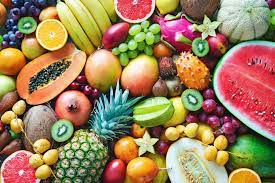
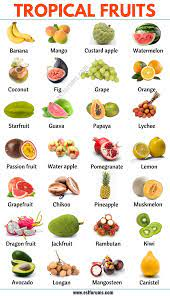
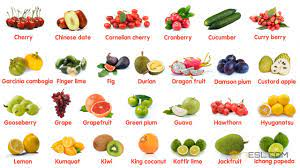
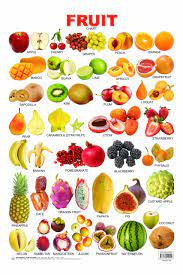
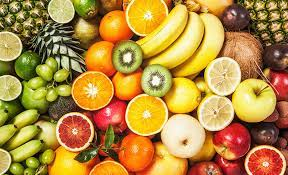
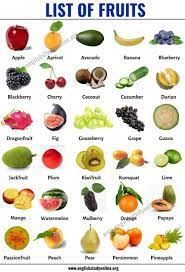
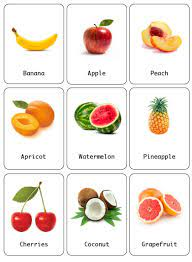
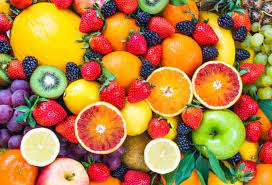
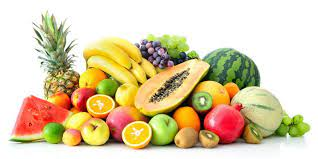
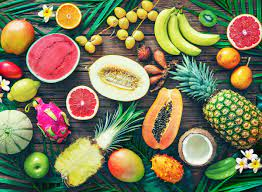
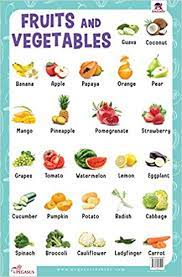
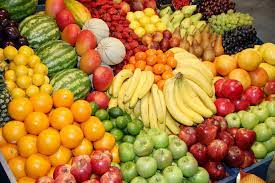
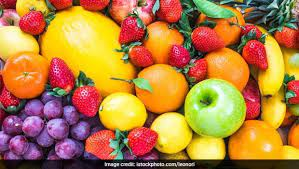
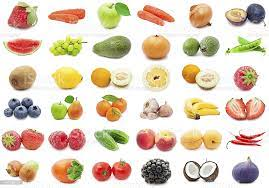
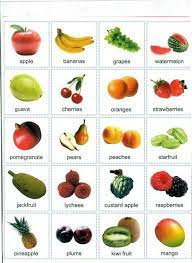
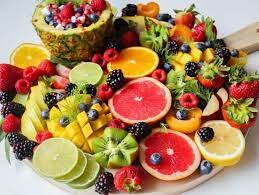
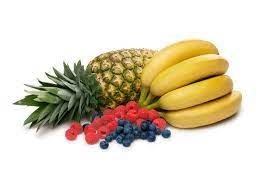
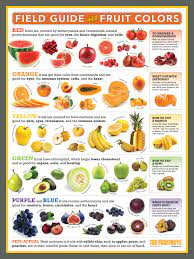
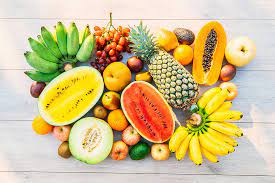
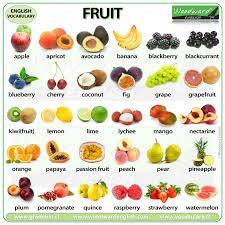

In [240]:
fruits_

In [241]:
len(fruits_)

48

In [244]:
df=pd.DataFrame({'Fruits urls':fruits_})
df

,Fruits urls
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


###### cars search

In [245]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://images.google.com/')
time.sleep(3)

In [246]:
cars=input()
search_fruits=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']").send_keys(cars)

cars


In [249]:
search_button=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']").click()

In [250]:
cars_=[]
for i in driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']"):
    cars_.append(i.get_attribute('src'))
    time.sleep(.05)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkoEVfwcUsb704-CldU0d4Kexj8se3fX_CeA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNy62ADY6qhNzvuqBxhw7Tr2CWpg1jtiGVYw&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
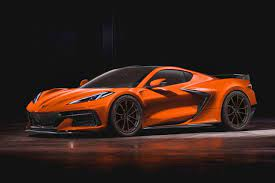
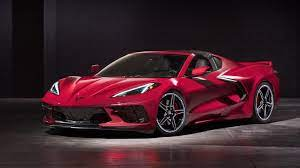
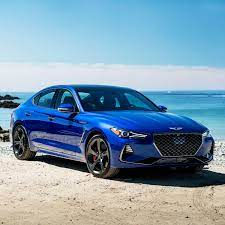
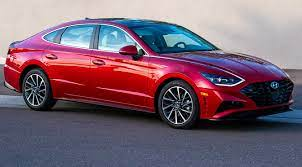
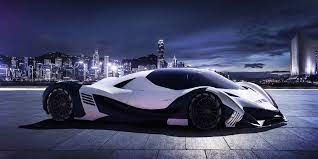
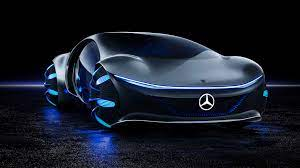
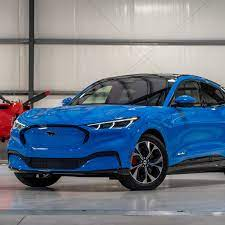
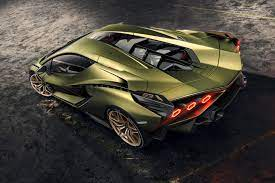
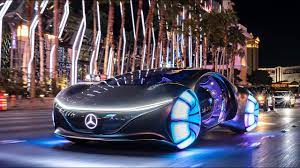
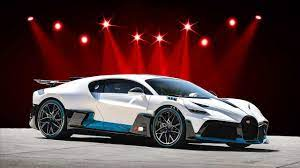
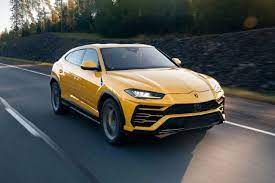
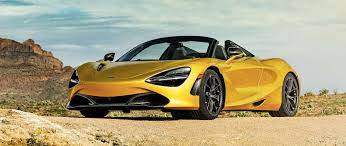
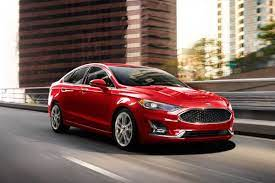
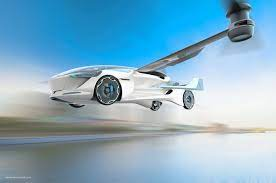
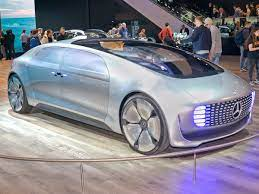
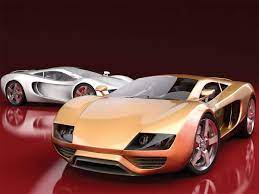
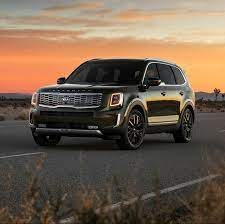
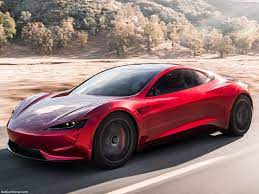
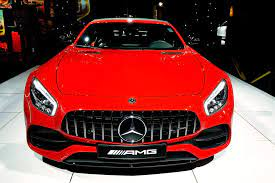
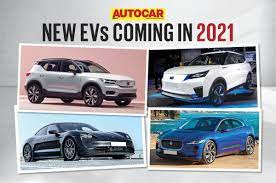

In [251]:
cars_

In [252]:
len(cars_)

48

In [254]:
df=pd.DataFrame({'cars urls':cars_})
df

,cars urls
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


###### machine learning search

In [255]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://images.google.com/')
time.sleep(3)

In [256]:
machine_learning=input()
search_fruits=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']").send_keys(machine_learning)

machine learning


In [259]:
search_button=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']").click()

In [260]:
ml_=[]
for i in driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']"):
    ml_.append(i.get_attribute('src'))
    time.sleep(.05)

In [262]:
len(ml_)

48

In [265]:
df=pd.DataFrame({'machine learning urls':ml_})
df

,machine learning urls
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
2,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


# 4) Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [72]:
import numpy as np
import pandas as pd
import selenium
from selenium import webdriver
import time

In [73]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://www.flipkart.com')
time.sleep(3)

In [74]:
login_box=driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']")
login_box.click()

In [75]:
search=input()
search_item=driver.find_element_by_xpath("//input[@class='_3704LK']").send_keys(search)

google pixel 4a


In [76]:
search_button=driver.find_element_by_xpath("//button[@class='L0Z3Pu']").click()

In [78]:
urls=[]
for i in driver.find_elements_by_xpath("//a[@class='_1fQZEK']"):
    urls.append(i.get_attribute('href'))

In [79]:
Brand_Name=[]
Smartphone_name=[]
Colour=[]
RAM=[]
Storage=[]
Primary_Camera=[] 
Secondary_Camera=[]
Display_Size=[]
Display_Resolution=[]
Processor=[]
Processor_Cores=[] 
Battery_Capacity=[]
Price=[]
Product_URL=[]

In [80]:
# Brand Name
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//span[@class='B_NuCI']")
        Brand_Name.append(bn.text)
    except:
        Brand_Name.append('-')
Brand_Name

['Google Pixel 4a (Just Black, 128 GB)  (6 GB RAM)',
 'Google Pixel 3a (Clearly White, 64 GB)  (4 GB RAM)',
 'Google Pixel 3 (Clearly White, 64 GB)  (4 GB RAM)',
 'Google Pixel 3 (Not Pink, 128 GB)  (4 GB RAM)',
 'Google Pixel 3 (Clearly White, 128 GB)  (4 GB RAM)',
 'Google Pixel 3 (Just Black, 128 GB)  (4 GB RAM)',
 'Google Pixel 2 XL (Just Black, 128 GB)  (4 GB RAM)',
 'Google Pixel XL (Very Silver, 128 GB)  (4 GB RAM)',
 'Google Pixel 2 (Clearly White, 128 GB)  (4 GB RAM)',
 'Google Pixel 3 XL (Just Black, 64 GB)  (4 GB RAM)',
 'Google Pixel 3 XL (Not Pink, 64 GB)  (4 GB RAM)',
 'Google Pixel 3 XL (Clearly White, 128 GB)  (4 GB RAM)',
 'Google Pixel 3 XL (Just Black, 128 GB)  (4 GB RAM)',
 'Google Pixel 3a XL (Clearly White, 64 GB)  (4 GB RAM)',
 'Google Pixel 3a XL (Just Black, 64 GB)  (4 GB RAM)',
 'Google Pixel (Quite Black, 32 GB)  (4 GB RAM)',
 'Google Pixel 2 (Just Black, 64 GB)  (4 GB RAM)',
 'Google Pixel 3 (Not Pink, 64 GB)  (4 GB RAM)',
 'Google Pixel 3a (Just Black, 64 G

In [87]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        search_button=driver.find_element_by_xpath("//button[@class='_2KpZ6l _1FH0tX']").click()
        sn=driver.find_element_by_xpath("///html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[5]/div/div[2]/div[1]/div[1]/table/tbody/tr[3]/td[2]/ul/li")
        Smartphone_name.append(sn.text)
    except:
        Smartphone_name.append('-')
Smartphone_name

['Handset, 18 W USB Type C Power Adapter, USB Type C to USB Type C Cable (USB 2.0, 1m), Quick Switch Adapter, SIM Tool, Quick Start Guide',
 'Handset, 18W USB-CTM Power Adapter, 1m USB-C to USB-C Cable, Quick Start Guide, Quick Switch Adapter, SIM Tool, Earbuds',
 'Handset, USB Type-C 18W Adaptor with USB-PD, C-C Cable (USB 2.0), SIM Tool, Quick Switch Adapter, 3.5mm to USB-C Headphone Adapter (aka Headphone Adapter), USB Type-C Earbuds',
 'Handset, USB Type-C 18W Adaptor with USB-PD, C-C Cable (USB 2.0), SIM Tool, Quick Switch Adapter, 3.5mm to USB-C Headphone Adapter (aka Headphone Adapter), USB Type-C Earbuds',
 'Handset, USB Type-C 18W Adaptor with USB-PD, C-C Cable (USB 2.0), SIM Tool, Quick Switch Adapter, 3.5mm to USB-C Headphone Adapter (aka Headphone Adapter), USB Type-C Earbuds',
 'Handset, USB Type-C 18W Adaptor with USB-PD, C-C Cable (USB 2.0), SIM Tool, Quick Switch Adapter, 3.5mm to USB-C Headphone Adapter (aka Headphone Adapter), USB Type-C Earbuds',
 'Handset, USB Type-

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

In [ ]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        bn=driver.find_element_by_xpath("//td[@class='a-span9']")
        brand_name.append(bn.text)
    except:
        brand_name.append('-')
brand_name

# 5) Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [106]:
import numpy as np
import pandas as pd
import selenium
from selenium import webdriver
import time

In [107]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://www.google.com/maps')
time.sleep(3)

In [108]:
search=input()
search_item=driver.find_element_by_xpath("//input[@class='tactile-searchbox-input']").send_keys(search)

pilani


In [109]:
search_button=driver.find_element_by_xpath("//button[@class='searchbox-searchbutton']").click()

In [111]:
coordinates=[]
coordinates_=driver.find_element_by_xpath("//li[@class='nbpPqf-menu-x3Eknd']")
coordinates.append(coordinates_.text)
coordinates

['28.40202, 75.59104']

In [119]:
latitude=[]
for i in coordinates:
    latitude.append(i[:8])
latitude

['28.40202']

In [122]:
longitude=[]
for i in coordinates:
    longitude.append(i[10:])
longitude

['75.59104']

In [126]:
df=pd.DataFrame({'Place':search,'Co-ordinates':coordinates,'Latitude':latitude,'Longitude':longitude})
df

,Place,Co-ordinates,Latitude,Longitude
0,pilani,"28.40202, 75.59104",28.40202,75.59104


# 6) Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [127]:
import numpy as np
import pandas as pd
import selenium
from selenium import webdriver
import time

In [128]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://trak.in/')
time.sleep(3)

In [144]:
june_=[]
try:
    june=driver.find_element_by_xpath("//h2[@class='dataTables_scroll']")
    june_.append(june.text)
except:
    june_.append('-')
june_

['-']

# 7) Write a program to scrap all the available details of best gaming laptops from digit.in.

In [26]:
import numpy as np
import pandas as pd
import selenium
from selenium import webdriver
import time

In [27]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://www.digit.in/')
time.sleep(3)

In [75]:
name=[]
for i in driver.find_elements_by_xpath("//div[@class='searchProduct-desc']"):
    name.append(i.text)
name

[]

In [29]:
urls=[]
for i in driver.find_elements_by_xpath("//div[@class='searchPage']//a"):
    urls.append(i.get_attribute('href'))
urls

['https://www.digit.in/laptops/asus-g750jx-cv069p-price-4426.html',
 'https://www.digit.in/laptops/lenovo-g50-30-price-6793.html',
 'https://www.digit.in/laptops/asus-g53j-a-3d-gamer-s-delight-but-we-want-more-price-3465.html',
 'https://www.digit.in/laptops/dell-vostro-15-3500-price-221765.html',
 'https://www.digit.in/laptops/asus-rog-flow-x13-price-229735.html',
 'https://www.digit.in/laptops/hp-envy-dv6-7206tx-notebook-price-3097.html',
 'https://www.digit.in/laptops/hp-envy-15-k006tx-price-4429.html',
 'https://www.digit.in/laptops/samsung-series-9-np-900x3c-price-2663.html',
 'https://www.digit.in/gaming/sony-playstation-vita-price-2581.html',
 'https://www.digit.in/pc-components/asus-gtx980-matrix-platinum-price-4859.html']

In [71]:
pro_con=[]
for i in urls:
    driver.get(i) # to open the url
    p=driver.find_elements_by_xpath("//div[@class='pros-Cons']//ul")
    for i in p:
        try:
            pro_con.append(i.text.replace("+",' ').replace("Pros","PROS-").replace("Cons",", & CONS-").replace("\n",""))
            
        except:
            pro_con.append('-')
pro_con=pro_con[:10]
print('\n Pros and Cons \n\n',pro_con)


 Pros and Cons 

 ['PROS- Bundles with NVIDIA 3D goggles Good build quality Support for DirectX 11 graphics & USB 3.0', ', & CONS--Expensive-Ordinary speakers', 'PROS- Compact form factor Incredibly powerful processor 16:10 touchscreen display Comfortable backlit keyboard', ', & CONS--Mediocre battery life-No SD card reader-A proprietary x8 PCIe connection for the eGPU.-Built-in GTX 1650 Max-Q keeps the Ryzen 9 5900HS caged.', 'PROS- Very good performance 8GB of RAM Fairly quick 1TB hard drive Keyboard is one the best we have used on laptops Very bright display, makes up for the reflective nature Colour richness is very good Improved speakers over previous generation Built well', ', & CONS--We expected a 1920 x 1080 pixel display-Not for those who need a slim and light laptop-Misses out on a Blu-ray drive that the Ideapad Z580 offers-Cooling fan can be a tad noisy under heavy load', 'PROS- Unbelievably well built Stunning form factor Slimness defies all common logic Very good system p

In [69]:
des=[]
for i in urls:
    driver.get(i) # to open the url
    d=driver.find_elements_by_xpath("//div[@id='MoreLink_content-container-new']//p")
    for i in d:
        try:
            des.append(i.text.replace("\n",""))
            
        except:
            des.append('-')
des=des[:10]
print('\n Des \n\n',des)


 Des 

 ['Another, no-holds barred, uninterrupted gaming laptop that can burn a hole through your pocket – the ASUS ROG G750JX. It has an Intel Core i7 chip, 24GB of DDR3 RAM (yes, you read that right!), 1.5TB of storage, and comes with NVIDIA GeForce GTX 770M boasting 3GB GDDR5 memory. Clearly one of the best gaming laptop – nay, top gaming laptops – that money can buy you this festive season. Just go for it!', 'The Lenovo G series of laptops are aimed at budget consumers, and given Lenovo’s build quality it’s one of the best built laptops you’ll get under 30k that’s for sure. Everything from the keyboard deck, trackpad, palm rest, screen hinge, and bottom panel seems slightly better built on the G50-30 than most laptops sold at this price point. It comes with an Intel Pentium chip clocked at 2.16 GHz -- not a Core i3, but 2GB of RAM, 500GB hard drive, DVD drive, and one year’s warranty is good value for money.', "Dell's Vostro series of laptops have been the go-to option for many wh

In [72]:
len(pro_con)

10

In [70]:
len(des)

10

In [74]:
df=pd.DataFrame({'Laptop Name':name,'Pros & Cons':pro_con,'Description':des})
df

,Laptop Name,Pros & Cons,Description
0,Asus G750JX-CV069Pहिन्दी >+ COMPARE,PROS- Bundles with NVIDIA 3D goggles Good buil...,"Another, no-holds barred, uninterrupted gaming..."
1,Lenovo G50-30हिन्दी >+ COMPARE,", & CONS--Expensive-Ordinary speakers",The Lenovo G series of laptops are aimed at bu...
2,ASUS G53J - A 3D Gamer'S Delight But We Want M...,PROS- Compact form factor Incredibly powerful ...,Dell's Vostro series of laptops have been the ...
3,Dell Vostro 15 3500हिन्दी >+ COMPARE,", & CONS--Mediocre battery life-No SD card rea...",The Dell Vostro 15 3500 isn't one of those fla...
4,ASUS ROG Flow X13हिन्दी >+ COMPARE,PROS- Very good performance 8GB of RAM Fairly ...,
5,HP Envy Dv6-7206tx Notebookहिन्दी >+ COMPARE,", & CONS--We expected a 1920 x 1080 pixel disp...",The best thing about this laptop is that it co...
6,HP Envy 15-K006txहिन्दी >+ COMPARE,PROS- Unbelievably well built Stunning form fa...,
7,Samsung Series 9 (NP-900X3C)हिन्दी >+ COMPARE,", & CONS--Costs a hell lot of money-Heats up q...",The new Dell Vostro 15 3500 is powered by Inte...
8,Sony PlayStation Vita+ COMPARE,PROS- Powerful graphics Beautiful screen Dual ...,The Dell Vostro 15 3500 comes with plenty of p...
9,Asus GTX980 Matrix Platinumहिन्दी >+ COMPARE,", & CONS--Short battery life, and battery isn'...",The new Dell Vostro 15 3500 is now available t...


# 8) Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [52]:
import numpy as np
import pandas as pd
import selenium
from selenium import webdriver
import time

In [53]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://www.forbes.com/billionaires/')
time.sleep(3)

In [56]:
name=[]
for i in driver.find_elements_by_xpath("//div[@class='personName']"):
    name.append(i.text)
name

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani',
 'Amancio Ortega',
 'Francoise Bettencourt Meyers & family',
 'Zhong Shanshan',
 'Steve Ballmer',
 'Ma Huateng',
 'Carlos Slim Helu & family',
 'Alice Walton',
 'Jim Walton',
 'Rob Walton',
 'Michael Bloomberg',
 'Colin Zheng Huang',
 'MacKenzie Scott',
 'Daniel Gilbert',
 'Gautam Adani & family',
 'Phil Knight & family',
 'Jack Ma',
 'Charles Koch',
 'Julia Koch & family',
 'Masayoshi Son',
 'Michael Dell',
 'Tadashi Yanai & family',
 'François Pinault & family',
 'David Thomson & family',
 'Beate Heister & Karl Albrecht Jr.',
 'Wang Wei',
 'Miriam Adelson',
 'He Xiangjian',
 'Dieter Schwarz',
 'Zhang Yiming',
 'Giovanni Ferrero',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Li Ka-shing',
 'Qin Yinglin & family',
 'William Lei Ding',
 'Len Blavatnik',
 'Lee Shau Kee',
 'Jacqueline Mars',
 'John Mars',
 'Yang 

In [62]:
rank=[]
for i in driver.find_elements_by_xpath("//div[@class='rank']"):
    rank.append(i.text)
rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '27.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '48.',
 '50.',
 '51.',
 '52.',
 '53.',
 '53.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '62.',
 '64.',
 '65.',
 '66.',
 '66.',
 '68.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '75.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '89.',
 '89.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '96.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '105.',
 '105.',
 '107.',
 '107.',
 '109.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '118.',
 '119.',
 '119.',
 '121.',
 '121.',
 '121.',
 

In [63]:
networth=[]
for i in driver.find_elements_by_xpath("//div[@class='netWorth']"):
    networth.append(i.text)
networth

['$177 B',
 '$151 B',
 '$150 B',
 '$124 B',
 '$97 B',
 '$96 B',
 '$93 B',
 '$91.5 B',
 '$89 B',
 '$84.5 B',
 '$77 B',
 '$73.6 B',
 '$68.9 B',
 '$68.7 B',
 '$65.8 B',
 '$62.8 B',
 '$61.8 B',
 '$60.2 B',
 '$59.5 B',
 '$59 B',
 '$55.3 B',
 '$53 B',
 '$51.9 B',
 '$50.5 B',
 '$49.9 B',
 '$48.4 B',
 '$46.4 B',
 '$46.4 B',
 '$45.4 B',
 '$45.1 B',
 '$44.1 B',
 '$42.3 B',
 '$41.8 B',
 '$39.2 B',
 '$39 B',
 '$38.2 B',
 '$37.7 B',
 '$36.9 B',
 '$35.6 B',
 '$35.1 B',
 '$34.5 B',
 '$34.5 B',
 '$33.7 B',
 '$33.5 B',
 '$33 B',
 '$32 B',
 '$31.7 B',
 '$31.3 B',
 '$31.3 B',
 '$29.6 B',
 '$29.1 B',
 '$28.4 B',
 '$27.7 B',
 '$27.7 B',
 '$27 B',
 '$26.9 B',
 '$26.4 B',
 '$26.3 B',
 '$26.2 B',
 '$26.1 B',
 '$25.9 B',
 '$25.8 B',
 '$25.8 B',
 '$25.5 B',
 '$25 B',
 '$24.9 B',
 '$24.9 B',
 '$24.6 B',
 '$24.4 B',
 '$23.6 B',
 '$23.5 B',
 '$23.5 B',
 '$23.4 B',
 '$23.3 B',
 '$23 B',
 '$23 B',
 '$22.4 B',
 '$22 B',
 '$21.9 B',
 '$21.7 B',
 '$21.6 B',
 '$21.5 B',
 '$21.4 B',
 '$21.3 B',
 '$20.9 B',
 '$20.5 B',
 '

In [64]:
age=[]
for i in driver.find_elements_by_xpath("//div[@class='age']"):
    age.append(i.text)
age

['57',
 '49',
 '72',
 '65',
 '36',
 '90',
 '76',
 '48',
 '47',
 '63',
 '85',
 '67',
 '66',
 '65',
 '49',
 '81',
 '71',
 '72',
 '76',
 '79',
 '41',
 '50',
 '59',
 '58',
 '83',
 '56',
 '85',
 '58',
 '63',
 '56',
 '72',
 '84',
 '63',
 'N/A',
 '50',
 '75',
 '78',
 '81',
 '37',
 '56',
 '72',
 '70',
 '92',
 '55',
 '49',
 '63',
 '93',
 '81',
 '85',
 '39',
 '55',
 '52',
 '62',
 '58',
 '60',
 '76',
 '65',
 '83',
 '64',
 '42',
 '67',
 '85',
 '75',
 '88',
 '76',
 '70',
 '65',
 '82',
 '67',
 '67',
 '90',
 '75',
 '49',
 '78',
 '51',
 '50',
 '47',
 '68',
 '74',
 '93',
 '54',
 '70',
 '53',
 '73',
 '59',
 '80',
 '59',
 '71',
 '81',
 '57',
 '60',
 '54',
 '92',
 '50',
 '57',
 '65',
 '62',
 '70',
 '67',
 '43',
 '57',
 '54',
 '81',
 '74',
 '55',
 '49',
 '36',
 '39',
 '91',
 '56',
 '91',
 '36',
 '68',
 '81',
 '85',
 '66',
 '66',
 '55',
 '64',
 '52',
 '45',
 '63',
 '62',
 '85',
 '55',
 '82',
 '34',
 '56',
 '57',
 '50',
 '51',
 '88',
 'N/A',
 '70',
 '56',
 '51',
 '66',
 '91',
 '52',
 '91',
 '39',
 '54',
 '63

In [65]:
country=[]
for i in driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']"):
    country.append(i.text)
country

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'Spain',
 'France',
 'China',
 'United States',
 'China',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'India',
 'United States',
 'China',
 'United States',
 'United States',
 'Japan',
 'United States',
 'Japan',
 'France',
 'Canada',
 'Germany',
 'China',
 'United States',
 'China',
 'Germany',
 'China',
 'Italy',
 'France',
 'France',
 'Hong Kong',
 'China',
 'China',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'China',
 'Russia',
 'Hong Kong',
 'China',
 'Germany',
 'Russia',
 'Austria',
 'China',
 'Germany',
 'Russia',
 'China',
 'Mexico',
 'Italy',
 'Japan',
 'United States',
 'United States',
 'Russia',
 'Russia',
 'United States',
 'China',
 'Australia',
 'United States',
 'India',
 'China',
 'Chile',
 'Chi

In [66]:
source=[]
for i in driver.find_elements_by_xpath("//div[@class='source']"):
    source.append(i.text)
source

['Amazon',
 'Tesla, SpaceX',
 'LVMH',
 'Microsoft',
 'Facebook',
 'Berkshire Hathaway',
 'software',
 'Google',
 'Google',
 'diversified',
 'Zara',
 "L'Oréal",
 'beverages, pharmaceuticals',
 'Microsoft',
 'internet media',
 'telecom',
 'Walmart',
 'Walmart',
 'Walmart',
 'Bloomberg LP',
 'e-commerce',
 'Amazon',
 'Quicken Loans',
 'infrastructure, commodities',
 'Nike',
 'e-commerce',
 'Koch Industries',
 'Koch Industries',
 'internet, telecom',
 'Dell computers',
 'fashion retail',
 'luxury goods',
 'media',
 'supermarkets',
 'package delivery',
 'casinos',
 'home appliances',
 'retail',
 'TikTok',
 'Nutella, chocolates',
 'Chanel',
 'Chanel',
 'diversified',
 'pig breeding',
 'online games',
 'music, chemicals',
 'real estate',
 'candy, pet food',
 'candy, pet food',
 'real estate',
 'steel, investments',
 'batteries',
 'real estate',
 'BMW, pharmaceuticals',
 'metals',
 'Red Bull',
 'soy sauce',
 'shipping',
 'steel, transport',
 'e-commerce',
 'mining',
 'eyeglasses',
 'sensors',


In [67]:
industry=[]
for i in driver.find_elements_by_xpath("//div[@class='category']"):
    industry.append(i.text)
industry

['Technology',
 'Automotive',
 'Fashion & Retail',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Food & Beverage',
 'Technology',
 'Technology',
 'Telecom',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Diversified',
 'Diversified',
 'Telecom',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Fashion & Retail',
 'Service',
 'Gambling & Casinos',
 'Manufacturing',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Diversified',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Real Estate',
 'Food & Beverage',
 'Food & Beverage',
 'Real Estate',
 'Metals & Mining',
 'Energy',
 'Real Estate',
 'Automotive',
 'Metals & Mining',
 'Food & Be

In [70]:
billionaries=pd.DataFrame({'Rank':rank,'Name':name,'NetWorth':networth,'Age':age,'Country':country,'Source':source,'Industry':industry})
billionaries

,Rank,Name,NetWorth,Age,Country,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,88,Australia,real estate,Real Estate
196,197.,Leonid Fedun & family,$11.1 B,65,Russia,oil,Energy
197,197.,Eyal Ofer,$11.1 B,70,Israel,"real estate, shipping",Diversified
198,197.,Evan Spiegel,$11.1 B,30,United States,Snapchat,Technology


# 9) Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video

In [ ]:
import numpy as np
import pandas as pd
import selenium
from selenium import webdriver
import time

In [153]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://www.youtube.com/')
time.sleep(3)

In [155]:
enter=input()
search_bar=driver.find_element_by_xpath("//input[@id='search']").send_keys(enter)

laptop


In [156]:
search_button=driver.find_element_by_xpath("//button[@id='search-icon-legacy']").click()
time.sleep(3)

In [167]:
c=[]
# extracting laptop title
c_=driver.find_elements_by_xpath("//dyt-formatted-string[@class='style-scope ytd-comment-renderer']")
for i in c_:
    c.append(i.text)
print('\n comments  \n\n',c)


 comments  

 []


# 10) Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [194]:
import numpy as np
import pandas as pd
import selenium
from selenium import webdriver
import time

In [195]:
driver=webdriver.Chrome('chromedriver.exe')
driver.get('https://www.hostelworld.com/')
time.sleep(3)

In [196]:
d=[]
d_=driver.find_elements_by_xpath("//div[@class='subtitle body-3']")
for i in d_:
    d.append(i.text)
d=d[:26]
print('\n Distance  \n\n',d)


 Distance  

 ['Hostel - 3.6km from city centre', 'Hostel - 5.5km from city centre', 'Hostel - 11.9km from city centre', 'Hostel - 1.8km from city centre Show on Map', 'Hostel - 3km from city centre Show on Map', 'Hostel - 5.9km from city centre Show on Map', 'Hostel - 4.7km from city centre Show on Map', 'Hostel - 8.2km from city centre Show on Map', 'Hostel - 0.5km from city centre Show on Map', 'Hostel - 3.6km from city centre Show on Map', 'Hostel - 3.6km from city centre Show on Map', 'Hostel - 1.7km from city centre Show on Map', 'Hostel - 4.1km from city centre Show on Map', 'Hostel - 4.3km from city centre Show on Map', 'Hostel - 2.2km from city centre Show on Map', 'Hostel - 2.4km from city centre Show on Map', 'Hostel - 3.6km from city centre Show on Map', 'Hostel - 4.3km from city centre Show on Map', 'Hostel - 10km from city centre Show on Map', 'Hostel - 3.3km from city centre Show on Map', 'Hostel - 2km from city centre Show on Map', 'Hostel - 3.5km from city centre Show

In [197]:
"length of Distance",len(d)

('length of Distance', 26)

In [198]:
pp=[]
pp_=driver.find_elements_by_xpath("//div[@class='price-col']")
for i in pp_:
    pp.append(i.text)
pp=pp[::2]
pp=pp[:26]
print('\n privates from price  \n\n',pp)


 privates from price  

 ['Privates From\nRs3930', 'Privates From\nRs8099', 'Privates From\nRs4152', 'Privates From\nRs8203', 'Privates From\nRs5229', 'No Privates Available', 'Privates From\nRs4101', 'Privates From\nRs9329', 'Privates From\nRs6151', 'Privates From\nRs6664', 'Privates From\nRs8200', 'No Privates Available', 'Privates From\nRs18454', 'Privates From\nRs6297', 'Privates From\nRs10047', 'Privates From\nRs1738', 'Privates From\nRs6047', 'No Privates Available', 'Privates From\nRs4269', 'Privates From\nRs5124', 'Privates From\nRs6810', 'No Privates Available', 'Privates From\nRs4101', 'Privates From\nRs4101', 'Privates From\nRs2597', 'Privates From\nRs4306']


In [199]:
"length of privates from price",len(pp)

('length of privates from price', 26)

In [200]:
dp=[]
dp_=driver.find_elements_by_xpath("//div[@class='price-col']")
for i in dp_:
    dp.append(i.text)
dp=dp[1::2]
dp=dp[:26]
print('\n dorms from price  \n\n',dp)


 dorms from price  

 ['Dorms From\nRs1510', 'Dorms From\nRs1948', 'Dorms From\nRs1476', 'Dorms From\nRs1538', 'No Dorms Available', 'Dorms From\nRs1538', 'Dorms From\nRs1620', 'Dorms From\nRs2047', 'Dorms From\nRs1046', 'No Dorms Available', 'Dorms From\nRs1538', 'Dorms From\nRs1845', 'Dorms From\nRs1538', 'Dorms From\nRs2426', 'No Dorms Available', 'Dorms From\nRs866', 'No Dorms Available', 'Dorms From\nRs2050', 'No Dorms Available', 'Dorms From\nRs1243', 'Dorms From\nRs2091', 'Dorms From\nRs1276', 'No Dorms Available', 'Dorms From\nRs1538', 'Dorms From\nRs1572', 'Dorms From\nRs1613']


In [201]:
"length of dorms from price",len(dp)

('length of dorms from price', 26)

In [202]:
urls=[]
for i in driver.find_elements_by_xpath("//h2[@class='title title-6']//a"):
    urls.append(i.get_attribute('href'))

In [203]:
urls

['https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator-London/London/510?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-Kensington-Holland-Park/London/93920?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Crown-Battersea/London/60336?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/247london-Hostel-and-Private-Rooms/London/64523?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Steam-Engine-Waterloo/London/29389?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/The-London-Home-Hostel/London/80690?from=2021-07-26&to=2021-07-29&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Wombat-s

In [204]:
hostel_name=[]
for i in urls:
    driver.get(i) # to open the url
    d=driver.find_elements_by_xpath("//div[@class='title-2']")
    for i in d:
        try:
            hostel_name.append(i.text.replace("\n",""))
            
        except:
            hostel_name.append('-')
hostel_name=hostel_name[:26]
print('\n Hostel Name \n\n',hostel_name)


 Hostel Name 

 ["St Christopher's Village", 'Generator London', 'Safestay London Kensington Holland Park', 'PubLove @ The Crown, Battersea', '247london Hostel and Private Rooms', 'PubLove @ The Steam Engine, Waterloo', 'The London Home Hostel', "Wombat's The City Hostel London", 'Safestay London Elephant & Castle', 'The Dictionary Hostel', 'PubLove @ The Green Man, Paddington', 'Astor Museum Inn', 'PubLove @ The White Ferry, Victoria', 'Prime Backpackers Angel', 'Atlas Hostels', 'No.8 Willesden Hostel London', 'YHA London St Pancras', 'SoHostel', 'Keystone House Kings Cross', 'Clink261', 'Burlington Residence', 'London Waterloo Hostel', 'Jaeger Acton Hostel', 'Astor Hyde Park', 'Abercorn House', "St Christopher's Oasis-Female Only"]


In [205]:
"length of Hostel Name",len(hostel_name)

('length of Hostel Name', 26)

In [211]:
rating=[]
for i in urls:
    driver.get(i) # to open the url
    d=driver.find_elements_by_xpath("//div[@class='score orange big']")
    for i in d:
        try:
            rating.append(i.text.replace("\n",""))
            
        except:
            rating.append('-')
rating=rating[::2]
rating=rating[:26]
print('\n Rating \n\n',rating)


 Rating 

 ['8.9', '7.6', '9.8', '6.8', '8.9', '7.7', '9.3', '8.1', '6.9', '9.5', '8.9', '10', '8.9', '9.5', '8.9', '9.7', '8.2', '9.7', '8.0', '9.4', '9.1', '7.3', '8.6', '8.9', '7.3', '8.0']


In [212]:
"length of Rating",len(rating)

('length of Rating', 26)

In [209]:
total=[]
for i in urls:
    driver.get(i) # to open the url
    d=driver.find_elements_by_xpath("//div[@class='reviews']")
    for i in d:
        try:
            total.append(i.text.replace("\n",""))
            
        except:
            total.append('-')
total=total[::2]
total=total[:26]
print('\n Total Reviews \n\n',total)


 Total Reviews 

 ['10820 Total Reviews', '6733 Total Reviews', '1074 Total Reviews', '207 Total Reviews', '0 Total Reviews', '186 Total Reviews', '248 Total Reviews', '13130 Total Reviews', '3947 Total Reviews', '0 Total Reviews', '391 Total Reviews', '8707 Total Reviews', '130 Total Reviews', '513 Total Reviews', '194 Total Reviews', '4563 Total Reviews', '2775 Total Reviews', '3952 Total Reviews', '8109 Total Reviews', '3167 Total Reviews', '26 Total Reviews', '2400 Total Reviews', '879 Total Reviews', '11321 Total Reviews', '3654 Total Reviews', '593 Total Reviews']


In [210]:
"length of Total Reviews",len(total)

('length of Total Reviews', 26)

In [216]:
overall=[]
for i in urls:
    driver.get(i) # to open the url
    d=driver.find_elements_by_xpath("//div[@class='page-inner latest-reviews']")
    for i in d:
        try:
            overall.append(i.text.replace("\n",""))
            
        except:
            overall.append('-')
overall=overall[:26]
print('\n Overall Reviews \n\n',overall)


 Overall Reviews 

 ['Latest Reviews10Jul 11, 2021Excellent hostel in good location. Very clean, food and drink on site, and super friendly staff. Excellent value for money.Male, 31-4010Sep 28, 2020Great visit nice room very clean great staffMale, 31-409.7Jul 21, 2021Hostel very well located, friendly staff, clean. Only two things did not go as expected: the air conditioning in the room was not enough, it was very hot in London (about 30 degrees), the room was very stuffy. Another problem was the breakfast, which in the reservation said it was possible to buy it at 4 pounds, but at the hostel they said it was not possible to buy it, there was no breakfast available. But overall we were very satisfied and would definitely come back.Show MoreCouple, 25-309.4May 26, 2021All good, highly recommend!Male, 25-30Read all reviews', 'Latest Reviews10Feb 5, 2021simply the bestMale, 41+10Jan 21, 2021Clean, comfortable, great location and the staff were fantastic.Male, 31-409.4Feb 2, 2021Great sta

In [217]:
"length of Overall Reviews",len(overall)

('length of Overall Reviews', 26)

In [218]:
pd=[]
for i in urls:
    driver.get(i) # to open the url
    d=driver.find_elements_by_xpath("//div[@class='content collapse-content']")
    for i in d:
        try:
            pd.append(i.text.replace("\n",""))
            
        except:
            pd.append('-')
pd=pd[:26]
print('\n Property Des \n\n',pd)


 Property Des 

 ['COVID 19 Policy Update.In response to Coronavirus (COVID-19), additional safety and sanitation measures are currently in effect at this property, including social distancing and in-house disinfection. St Christopher’s Inns at The Village in London Bridge is the UK’s first capsule hostel. Its brand new rooms have been specially designed for our guests to get the best night sleep possible before they wake up in amongst one of London’s most vibrant areas. Voted as one of the best party hostels in the world, our multi-award winning hostel offers guests Japanese-style capsule beds with USB ports, cool mood lighting and curtains for privacy. We even have new private rooms with one having an awesome view of the Shard right outside!Step out the door and you’ll be just a short walk away from the London Eye, Tower Bridge and the oldest food market in the city, Borough Market. We’re also only a two minute walk from TWO tube stations so getting anywhere in London couldn’t be ea

In [219]:
"length of Property Description",len(pd)

('length of Property Description', 26)

In [220]:
f=[]
for i in urls:
    driver.get(i) # to open the url
    d=driver.find_elements_by_xpath("//div[@class='facilities-container']")
    for i in d:
        try:
            f.append(i.text.replace("\n",""))
            
        except:
            f.append('-')
f=f[:26]
print('\n facilities \n\n',f)


 facilities 

 ['FacilitiesFreeLinen Included Free City Maps Free WiFi Free Internet Access Free City TourGeneralSecurity Lockers Key Card Access Common Room Elevator Breakfast Not Included Air Conditioning Adaptors Book Exchange Hot Showers Dryer Outdoor Terrace Reading Light Hair Dryers For Hire Hair Dryers Iron / Ironing Board Microwave Washing Machine Towels Not Included Flexible NRR Follows Covid-19 sanitation guidanceServicesInternet access Laundry Facilities Towels for hire Luggage Storage 24 Hour Reception Tours/Travel Desk ATM 24 Hour Security HousekeepingFood & DrinkRestaurant Bar Meals Available Vending Machines Tea & Coffee Making FacilitiesEntertainmentNightclub Games Room Wi-Fi', 'FacilitiesFreeLinen Included Free City Maps Free WiFi Free Internet AccessGeneralWheelchair Friendly Security Lockers Key Card Access Common Room Elevator Bicycle Parking Breakfast Not Included Meeting Rooms Hot Showers Reading Light Safe Deposit Box Card Phones Washing Machine Towels Not Inclu

In [221]:
"length of Facility",len(f)

('length of Facility', 26)

In [225]:
import pandas as pd
df=pd.DataFrame({"Hostel Name":hostel_name,"Privates From Price":pp,"Dorms From Price":dp,"Rating":rating,"Total Reviews":total,"Overall Reviews":overall,"Property Description":pd,"Facility":f})
df

,Hostel Name,Privates From Price,Dorms From Price,Rating,Total Reviews,Overall Reviews,Property Description,Facility
0,St Christopher's Village,Privates From\nRs3930,Dorms From\nRs1510,8.9,10820 Total Reviews,"Latest Reviews10Jul 11, 2021Excellent hostel i...",<module 'pandas' from 'C:\\Users\\machi\\anaco...,FacilitiesFreeLinen Included Free City Maps Fr...
1,Generator London,Privates From\nRs8099,Dorms From\nRs1948,7.6,6733 Total Reviews,"Latest Reviews10Feb 5, 2021simply the bestMale...",<module 'pandas' from 'C:\\Users\\machi\\anaco...,FacilitiesFreeLinen Included Free City Maps Fr...
2,Safestay London Kensington Holland Park,Privates From\nRs4152,Dorms From\nRs1476,9.8,1074 Total Reviews,"Latest Reviews10Jul 15, 2021Super nice stay .T...",<module 'pandas' from 'C:\\Users\\machi\\anaco...,FacilitiesFreeLinen Included Free WiFiGeneralS...
3,"PubLove @ The Crown, Battersea",Privates From\nRs8203,Dorms From\nRs1538,6.8,207 Total Reviews,"Latest Reviews9.4Feb 15, 2020Pleasant place wi...",<module 'pandas' from 'C:\\Users\\machi\\anaco...,FacilitiesFreeLinen Included Free City Maps Fr...
4,247london Hostel and Private Rooms,Privates From\nRs5229,No Dorms Available,8.9,0 Total Reviews,"Latest Reviews9.4Jul 12, 2019Very good place t...",<module 'pandas' from 'C:\\Users\\machi\\anaco...,FacilitiesFreeLinen Included Free WiFi Free In...
5,"PubLove @ The Steam Engine, Waterloo",No Privates Available,Dorms From\nRs1538,7.7,186 Total Reviews,"Latest Reviews10Dec 22, 2020the steam engine i...",<module 'pandas' from 'C:\\Users\\machi\\anaco...,FacilitiesFreeLinen Included Free City Maps Fr...
6,The London Home Hostel,Privates From\nRs4101,Dorms From\nRs1620,9.3,248 Total Reviews,"Latest Reviews9.7Dec 2, 2019I have stayed in a...",<module 'pandas' from 'C:\\Users\\machi\\anaco...,FacilitiesFreeLinen Included Free WiFi Free In...
7,Wombat's The City Hostel London,Privates From\nRs9329,Dorms From\nRs2047,8.1,13130 Total Reviews,"Latest Reviews10Jul 10, 2021Really nice hostel...",<module 'pandas' from 'C:\\Users\\machi\\anaco...,FacilitiesFreeLinen Included Free City Maps To...
8,Safestay London Elephant & Castle,Privates From\nRs6151,Dorms From\nRs1046,6.9,3947 Total Reviews,"Latest Reviews10Jul 7, 2021Perfect and cleanMa...",<module 'pandas' from 'C:\\Users\\machi\\anaco...,FacilitiesFreeLinen Included Free City Maps Fr...
9,The Dictionary Hostel,Privates From\nRs6664,No Dorms Available,9.5,0 Total Reviews,"Latest Reviews10Feb 28, 2020One of the best ho...",<module 'pandas' from 'C:\\Users\\machi\\anaco...,FacilitiesFreeLinen Included Free City Maps Fr...
